In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

In [46]:
#Build the model
# https://github.com/sol0invictus/Blog_stuff/blob/master/custom%20loss/low_level_tf.py
class model:

    def __init__(self):
        xavier=tf.keras.initializers.GlorotUniform()
        self.l1=tf.keras.layers.Dense(64, kernel_initializer=xavier, activation=tf.nn.sigmoid, input_shape=[1])
        self.l2=tf.keras.layers.Dense(64, kernel_initializer=xavier, activation=tf.nn.sigmoid)
        self.out=tf.keras.layers.Dense(1, kernel_initializer=xavier)
        self.train_op = tf.keras.optimizers.Adam(learning_rate=0.1)
        print(self.l1.variables)
    
    # Running the model
    def run(self,X):
        l1=self.l1(X)
        l2=self.l2(l1)
        out=self.out(l2)
        return out
    
    #Custom loss fucntion
    def get_loss(self,X,Y):
        out = self.run(X)
        return tf.math.square(out-Y)
    
    # get gradients
    def get_grad(self,X,Y):
        with tf.GradientTape() as tape:
            tape.watch(self.l1.variables)
            tape.watch(self.l2.variables)
            tape.watch(self.out.variables)
            L = self.get_loss(X,Y)
            g = tape.gradient(L, [self.l1.variables[0],self.l1.variables[1],self.l2.variables[0],self.l2.variables[1],self.out.variables[0],self.out.variables[1]])
        return g
    
    # perform gradient descent
    def network_learn(self,X,Y):
        g = self.get_grad(X,Y)
        # print(self.var)
        self.train_op.apply_gradients(zip(g, [self.l1.variables[0],self.l1.variables[1],self.l2.variables[0],self.l2.variables[1],self.out.variables[0],self.out.variables[1]]))


In [47]:
#Custom training
xs=np.linspace(-15,15,200,dtype=np.float32).reshape((-1,1))
ys = np.sin(2*xs)/xs
m=model()

[]


In [57]:
for i in range(1000):
    m.network_learn(xs,ys)

In [58]:
pred = m.run(xs)

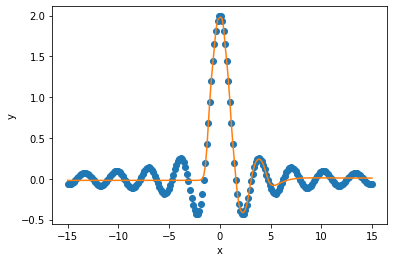

In [59]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xs,ys,'o')
plt.plot(xs, pred)

In [60]:
m.out

In [61]:
m.out.variables

[<tf.Variable 'dense_35/kernel:0' shape=(64, 1) dtype=float32, numpy=
 array([[-0.4752372 ],
        [ 0.44487464],
        [ 0.27201873],
        [-0.24739458],
        [ 0.43510368],
        [ 0.48952007],
        [ 0.00619285],
        [-0.13460757],
        [ 0.5355147 ],
        [ 0.49398986],
        [ 0.10588571],
        [-0.01864033],
        [ 0.5388805 ],
        [-0.00737838],
        [ 0.5366672 ],
        [-0.3931493 ],
        [-0.62950987],
        [ 0.73207355],
        [ 0.50860596],
        [ 0.21945259],
        [-0.5196515 ],
        [ 0.53923607],
        [-0.59954077],
        [ 0.50006497],
        [ 0.35046196],
        [-0.57471997],
        [ 0.4989731 ],
        [-0.00586353],
        [ 0.38437974],
        [-0.31589237],
        [-0.43109378],
        [ 0.19149438],
        [ 0.352139  ],
        [ 0.49148372],
        [-0.03508084],
        [-0.3036763 ],
        [-0.5988381 ],
        [ 0.5801878 ],
        [ 0.3498385 ],
        [ 0.5016351 ],
        [-

In [62]:
m.out.variables[0]

<tf.Variable 'dense_35/kernel:0' shape=(64, 1) dtype=float32, numpy=
array([[-0.4752372 ],
       [ 0.44487464],
       [ 0.27201873],
       [-0.24739458],
       [ 0.43510368],
       [ 0.48952007],
       [ 0.00619285],
       [-0.13460757],
       [ 0.5355147 ],
       [ 0.49398986],
       [ 0.10588571],
       [-0.01864033],
       [ 0.5388805 ],
       [-0.00737838],
       [ 0.5366672 ],
       [-0.3931493 ],
       [-0.62950987],
       [ 0.73207355],
       [ 0.50860596],
       [ 0.21945259],
       [-0.5196515 ],
       [ 0.53923607],
       [-0.59954077],
       [ 0.50006497],
       [ 0.35046196],
       [-0.57471997],
       [ 0.4989731 ],
       [-0.00586353],
       [ 0.38437974],
       [-0.31589237],
       [-0.43109378],
       [ 0.19149438],
       [ 0.352139  ],
       [ 0.49148372],
       [-0.03508084],
       [-0.3036763 ],
       [-0.5988381 ],
       [ 0.5801878 ],
       [ 0.3498385 ],
       [ 0.5016351 ],
       [-0.39333647],
       [ 0.5283375 ],
       

In [63]:
m.out.variables[1]

<tf.Variable 'dense_35/bias:0' shape=(1,) dtype=float32, numpy=array([0.32088003], dtype=float32)>